## Testes de Hipóteses e Inferência Estatística

Na parte sobre distribuições vimos vários tipos de distribuições para vários tipos de dados e também com calcular a probailidade associada a algumas distribuições. 

Agora vamos fazer alguns exercícios que consistem em testar hipóteses.  
Experimentos desse tipo estão presente em estatística aplicada a áreas diversas como medicina, economia, engenharia, ciências sociais e, especialmente, ciência de dados. O objetivo é claro: construir experimentos capazes de **confirmar ou rejeitar uma hipótese**, com base em evidências empíricas.

No contexto da ciência de dados, essa necessidade se manifesta frequentemente em situações como **testes A/B**, **otimização de interfaces de usuário**, **campanhas de marketing**, **modelagem de conversão** e muitas outras aplicações práticas. Nesses cenários, somos confrontados com perguntas do tipo:

- "Essa nova funcionalidade aumenta o engajamento dos usuários?"
- "Esse modelo de precificação gera mais receita que o anterior?"
- "Essa recomendação personalizada converte mais que o padrão?"

Responder a essas perguntas exige mais do que observação casual: requer **estrutura experimental, análise rigorosa e inferência estatística**.

---
<div class="unnumbered-subsection">

### A Cadeia Clássica da Inferência Estatística
</div>

Sempre que você se deparar com termos como **significância estatística**, **teste t** ou **valor p**, eles estão inseridos em um processo estruturado, muitas vezes chamado de **cadeia clássica da inferência estatística**, que pode ser descrita nos seguintes passos:

1. **Formulação da Hipótese**  
   Uma hipótese clara e testável é estabelecida. Por exemplo:  
   > “O modelo A gera maior taxa de conversão que o modelo B.”

2. **Desenho do Experimento**  
   Um experimento (muitas vezes randomizado) é planejado para **testar essa hipótese**, garantindo que os dados coletados serão confiáveis e permitirão conclusões robustas.

3. **Coleta e Análise de Dados**  
   Os dados do experimento são coletados e analisados com ferramentas estatísticas apropriadas, como **intervalos de confiança**, **testes t**, **testes de proporções**, entre outros.

4. **Inferência e Conclusão**  
   Com base nos resultados, tomamos decisões: **rejeitar ou não a hipótese nula**. A ideia é generalizar os achados do experimento para uma população ou contexto mais amplo.

O termo **inferência** destaca justamente essa intenção de extrapolar o conhecimento obtido em uma **amostra limitada de dados** para inferir algo mais geral, com grau de confiança quantificado.

---

<div class="unnumbered-subsection">

### Intervalos de Confiança e Testes de Hipóteses
</div>

Uma das primeiras ferramentas utilizadas nesse processo são os **intervalos de confiança**. Eles fornecem uma estimativa de onde, com determinada confiança (por exemplo, 95%), está o parâmetro real da população (como uma média, proporção, ou diferença entre grupos). Esses intervalos ajudam a entender a **precisão das estimativas** e servem de base para decisões formais em testes de hipótese.

Por exemplo, se ao comparar duas versões de uma interface de usuário, o intervalo de confiança da diferença entre as taxas de conversão **não contém zero**, temos uma indicação de que **existe uma diferença estatisticamente significativa** entre as versões — o que pode motivar uma ação prática.

---

Neste capítulo, vamos explorar os principais conceitos e métodos ligados à inferência estatística e aos testes de hipóteses, com foco em aplicações reais na ciência de dados. Entre os tópicos abordados, estão:

- Intervalos de confiança – cálculos passo a passo
- Distribuição T Student
- Intervalos de confiança e Classificação
- Testes de hipóteses
- Teste Z
- Teste T
- Qui quadrado
- ANOVA
- Qui quadrado e ANOVA para seleção de atributos
- Testes de Wilcoxon, Friedman e Nemenyi
- Aplicações para avaliação de algoritmos/trabalhos científicos

Vamos construir esse conhecimento passo a passo, conectando a teoria estatística com a prática do dia a dia no desenvolvimento de produtos, experimentação e tomada de decisões baseadas em dados.


### Intervalo de Confiança

Os intervalos de confiança são usados para estimar um parâmetro populacional com base em dados amostrais, fornecendo uma faixa dentro da qual o valor verdadeiro provavelmente se encontra.

---

#### IC para a Média (σ conhecido, distribuição Normal)

$$
IC = \bar{x} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Onde:
- $\bar{x}$ = média amostral  
- $z_{\alpha/2}$ = valor crítico da normal padrão  (z-score, tabelado)
- $\sigma$ = desvio padrão populacional  
- $n$ = tamanho da amostra


In [1]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_15448\4205328392.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.stats import norm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site

AttributeError: _ARRAY_API not found

In [2]:
# base de dados baseada em alturo de pessoas
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
n = len(dados)
n

100

In [4]:
media = np.mean(dados)
media

np.float64(159.25)

In [5]:
desvio_padrao = np.std(dados)
desvio_padrao

np.float64(13.65)

#### Cálculo manual do Intervalo de Confiança

In [6]:
alpha = 0.05 / 2    # alpha referente a 95%, dividindo alpha por 2 para o teste bicaudal
alpha, 1 - alpha   # valor crítico para o teste bicaudal

(0.025, 0.975)

In [7]:
z = norm.ppf(1 - alpha) # valor crítico z para o teste bicaudal
z

np.float64(1.959963984540054)

In [8]:
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_inferior

np.float64(156.57464916110283)

In [9]:
x_superior = media + z * (desvio_padrao / math.sqrt(n))
x_superior

np.float64(161.92535083889717)

In [10]:
margem_erro = abs(media - x_superior)
margem_erro

np.float64(2.675350838897174)

c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


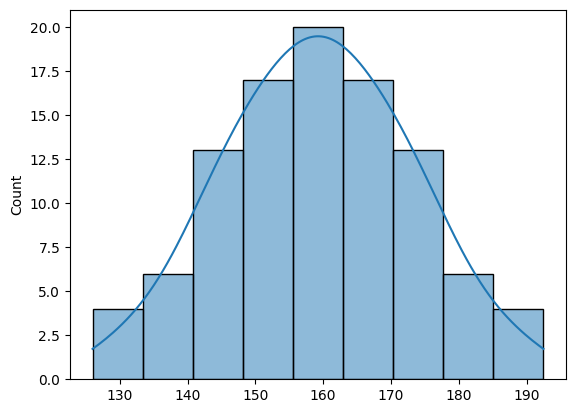

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dados, kde=True)
plt.show()

#### Cálculo do intervalo de confiança com Scipy

In [12]:
stats.sem(dados)

np.float64(1.3718766178288244)

In [13]:
desvio_padrao / math.sqrt(n - 1)

np.float64(1.3718766178288246)

In [14]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(np.float64(156.5611712378229), np.float64(161.9388287621771))

In [15]:
margem_erro = media - intervalos[0]
margem_erro

np.float64(2.68882876217711)

#### Diferentes níveis de confiança

In [18]:
for nivel_conf in [0.8, 0.85, 0.9, 0.95, 0.99]:
    intervalo = norm.interval(nivel_conf, media, stats.sem(dados))
    margem_erro = media - intervalo[0]
    print(f"Intervalo de confiança {nivel_conf}: {intervalo}, Margem de erro: {margem_erro}") 

Intervalo de confiança 0.8: (np.float64(157.49186937268743), np.float64(161.00813062731257)), Margem de erro: 1.7581306273125676
Intervalo de confiança 0.85: (np.float64(157.2751404343908), np.float64(161.2248595656092)), Margem de erro: 1.9748595656091936
Intervalo de confiança 0.9: (np.float64(156.99346376943433), np.float64(161.50653623056567)), Margem de erro: 2.256536230565672
Intervalo de confiança 0.95: (np.float64(156.5611712378229), np.float64(161.9388287621771)), Margem de erro: 2.68882876217711
Intervalo de confiança 0.99: (np.float64(155.71628000694295), np.float64(162.78371999305705)), Margem de erro: 3.5337199930570478


#### Exercicio

In [19]:
dados_salario = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192 , 79.1952, 56.518 ,
                          70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                          60.1489, 78.5932, 76.0459, 67.7726, 64.6149, 80.1948, 76.7998,
                          76.1831, 80.7065, 62.4953, 57.204 , 62.5408, 80.0982, 63.287 ,
                          66.5826, 79.3674])

In [20]:
media = dados_salario.mean()
media

np.float64(70.14025666666666)

In [21]:
intervalos = norm.interval(0.95, media, stats.sem(dados_salario))
intervalos

(np.float64(67.26506308375339), np.float64(73.01545024957993))

Temos 95% de confiança de que a média salarial das pessoas está
no intervalo entre 67.26 e 73.01

### Intervalos de confiança com Distribuição T Student

Lembrando que a T Stdent é adequada para amostras pequenas (n < 30) ou quando a variância da população é desconhecida.



#### IC para a Média (σ desconhecido, Distribuição T Student)

$$
IC = \bar{x} \pm t_{\alpha/2, \, n-1} \cdot \frac{s}{\sqrt{n}}
$$

Onde:
- $s$ = desvio padrão amostral  
- $t_{\alpha/2, \, n-1}$ = valor crítico da distribuição T com $n-1$ graus de liberdade  
- $n$ = tamanho da amostra


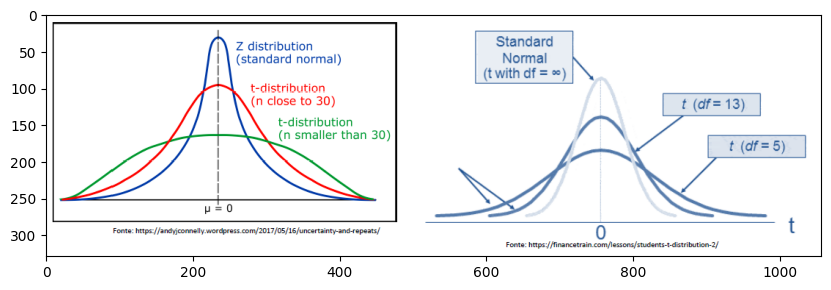

In [22]:
# incuir figura png do diretorio
import matplotlib.image as mpimg
img = mpimg.imread('t-student.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)

In [23]:
dados = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])


In [24]:
n = len(dados)
print(f"n: {n}")

media = np.mean(dados)
print(f"Média: {media}")

desvio_padrao = np.std(dados)
print(f"Desvio Padrão: {desvio_padrao}")

n: 9
Média: 161.77777777777777
Desvio Padrão: 12.786953227391823


In [25]:
from scipy.stats import t

In [26]:
# calcular o valor crítico t para um nível de confiança de 95% e n-1 graus de liberdade
alpha = 0.05 / 2  # alpha para teste bicaudal
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof = 0))
print(f"Intervalos de confiança: {intervalos}")

margem_erro = media - intervalos[0]
print(f"Margem de erro: {margem_erro}")

Intervalos de confiança: (np.float64(151.94885543810184), np.float64(171.6067001174537))
Margem de erro: 9.828922339675927


## Intervalos de Confiança e Classificação

Predição de pagamento de empréstimo. 

O código abaixo realiza um experimento de comparação entre três algoritmos de classificação — **Naive Bayes**, **Regressão Logística** e **Random Forest** — usando validação cruzada repetida.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('data/credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  
  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_bayes_cv_300.append(scores)
  resultados_naive_bayes_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv_300.append(scores)
  resultados_logistica_cv.append(scores.mean())
  
  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv_300.append(scores)
  resultados_forest_cv.append(scores.mean())

resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


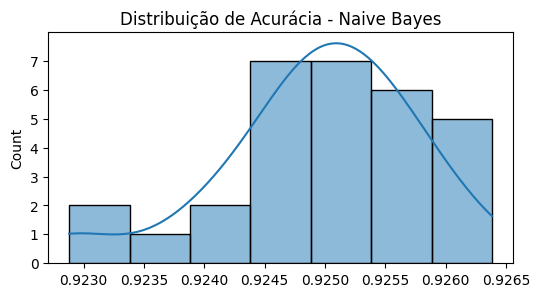

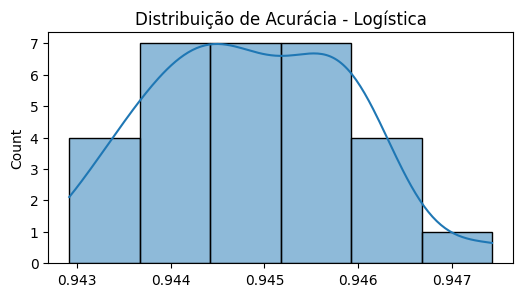

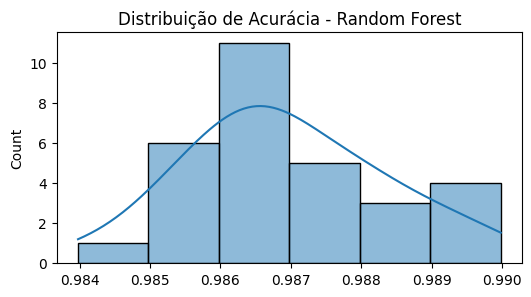

In [31]:
# plotar as distribuicoes
labels = ['Naive Bayes', 'Logística', 'Random Forest']
dists = [resultados_naive_bayes_cv, resultados_logistica_cv, resultados_forest_cv]
for dist, label in zip(dists, labels):
    plt.figure(figsize=(6, 3))
    sns.histplot(dist, kde=True, label=label)
    plt.title(f'Distribuição de Acurácia - {label}')




In [32]:
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(np.float64(0.9249359296482411),
 np.float64(0.9448667504187604),
 np.float64(0.9869304857621441))

In [34]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(np.float64(0.08641071566366061),
 np.float64(0.10802610833013937),
 np.float64(0.14125036072756086))

c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


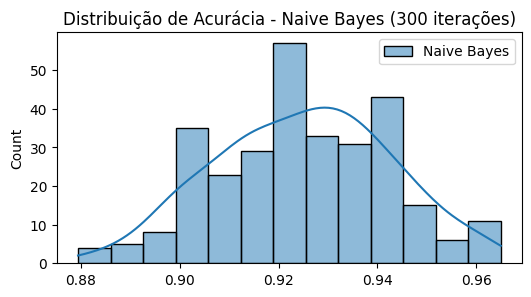

c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


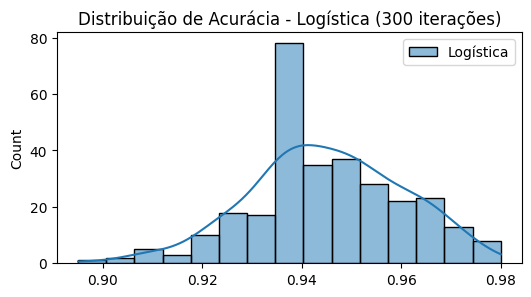

c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


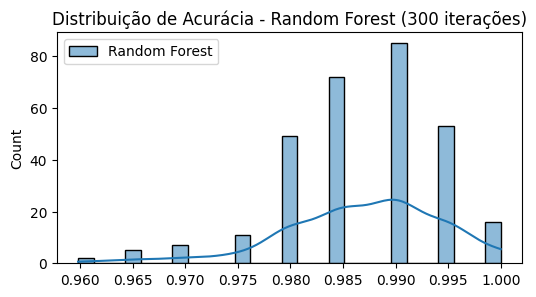

In [35]:
# plotar as distribuições 300
for dist, label in zip([resultados_naive_bayes_cv_300, resultados_logistica_cv_300, resultados_forest_cv_300], labels):
    plt.figure(figsize=(6, 3))
    sns.histplot(dist, kde=True, label=label)
    plt.title(f'Distribuição de Acurácia - {label} (300 iterações)')
    plt.legend()
    plt.show()

### Intervalos de confiança para distribuições normal e T

In [38]:
from scipy.stats import t
from scipy.stats import norm

#### Neïve Bayes

In [41]:
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv) - 1, 
                                    resultados_naive_bayes_cv.mean(), 
                                    stats.sem(resultados_naive_bayes_cv, ddof = 0))

abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1])

np.float64(0.0002984425233454324)

In [42]:
intervalos_naive_bayes_n = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(), 
                                         stats.sem(resultados_naive_bayes_cv_300))
abs(resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

np.float64(0.0020025402837702266)

#### Regressão Logística

In [46]:
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv) - 1, 
                                    resultados_logistica_cv.mean(), 
                                    stats.sem(resultados_logistica_cv, ddof = 0))
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

np.float64(0.00038113668162764736)

In [47]:
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_300.mean(), 
                                       stats.sem(resultados_logistica_cv_300))
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

np.float64(0.0017353547478814457)

#### Random Forest

In [50]:
intervalos_forest_t = t.interval(0.95, len(resultados_forest_cv) - 1, 
                                 resultados_forest_cv.mean(),   
                                    stats.sem(resultados_forest_cv, ddof = 0))
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

np.float64(0.0005205441630358187)

In [51]:
inervalos_forest_n = norm.interval(0.95, resultados_forest_cv_300.mean(), 
                                   stats.sem(resultados_forest_cv_300)) 
abs(resultados_forest_cv_300.mean() - inervalos_forest_n[1])

np.float64(0.0008554464954150243)

Temos 95% de confiança de que a média de acertos do Random Forest está
no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%

## Teste de Hipótese

Vimos que eles fornecem uma estimativa de onde, com determinada confiança (por exemplo, 95%), está o parâmetro real da população (como uma média, proporção, ou diferença entre grupos). Esses intervalos ajudam a entender a precisão das estimativas e servem de base para decisões formais em testes de hipótese.

Por exemplo, se ao comparar duas versões de uma interface de usuário, o intervalo de confiança da diferença entre as taxas de conversão não contém zero, temos uma indicação de que existe uma diferença estatisticamente significativa entre as versões — o que pode motivar uma ação prática.

Nível de Significância, Valor p e Tipos de Erro

Nos testes de hipóteses, buscamos avaliar a probabilidade de rejeitar a hipótese nula com base nos dados amostrais. Essa probabilidade está diretamente relacionada ao valor p (p-valor), que indica a força da evidência contra a hipótese nula.

Quanto menor o valor p, mais forte é a evidência contra a hipótese nula.

Um valor p menor que o nível de significância α (por exemplo, 0,05) indica que rejeitamos a hipótese nula.

Os níveis de significância são interpretados da seguinte forma:

$\alpha = 0{,}05$ → evidência moderada contra $H_0$

$\alpha = 0{,}01$ → evidência forte contra $H_0$

$\alpha = 0{,}001$ → evidência muito forte contra $H_0$

Por exemplo, um teste com $\alpha = 0{,}05$ significa que estamos dispostos a aceitar uma chance de 5% de rejeitar a hipótese nula quando ela for verdadeira, ou seja, cometer um erro do tipo I.

Tipos de Erro

Erro Tipo I (falso positivo): Rejeitar a hipótese nula quando ela é verdadeira.Ex: Concluir que um novo modelo é melhor, quando na verdade não é.

Erro Tipo II (falso negativo): Não rejeitar a hipótese nula quando ela é falsa.Ex: Deixar de adotar uma melhoria real por não detectar seu efeito.

A escolha do nível de significância afeta diretamente o risco de cometer erros, sendo uma etapa essencial na construção de inferências estatísticas confiáveis.

Neste capítulo, vamos explorar os principais conceitos e métodos ligados à inferência estatística e aos testes de hipóteses, com foco em aplicações reais na ciência de dados. Entre os tópicos abordados, estão:

Hipóteses nula e alternativa

Nível de significância e erro tipo I e II

Valor p e sua interpretação correta

Intervalos de confiança e sua relação com os testes

Testes t, z e testes para proporções

Considerações práticas em testes A/B

Desafios e armadilhas comuns na inferência estatística

Vamos construir esse conhecimento passo a passo, conectando a teoria estatística com a prática do dia a dia no desenvolvimento de produtos, experimentação e tomada de decisões baseadas em dados.

In [63]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])
H0_media = np.mean(dados_originais)
H0_desvio_padrao = np.std(dados_originais)
print('H0 é a hipótese nula, que representa os dados originais.')
print(f"H0 Média: {H0_media}, H0 Desvio Padrão: {H0_desvio_padrao}")
# Simulando novos dados com um aumento de 3%
dados_novos = dados_originais * 1.03
H1_media = np.mean(dados_novos)
H1_desvio_padrao = np.std(dados_novos)
print('H1 é a hipótese alternativa, que representa os dados com um aumento de 3%.')
print(f"H1 Média: {H1_media}, H1 Desvio Padrão: {H1_desvio_padrao}")

H0 é a hipótese nula, que representa os dados originais.
H0 Média: 159.25, H0 Desvio Padrão: 13.65
H1 é a hipótese alternativa, que representa os dados com um aumento de 3%.
H1 Média: 164.0275, H1 Desvio Padrão: 14.0595


### Teste de hipótese Z

In [66]:
H1_n = len(dados_novos)
Z = (H1_media - H0_media) / (H1_desvio_padrao / math.sqrt(H1_n))
print(f"Z: {Z}")

print (norm.cdf(3.398058252427187), norm.ppf(0.9996606701617486))

Z = norm.cdf(Z)
print(f"Z (valor crítico): {Z}")
alpha = 0.05   # nível de significância
print(f"Nível de significância (alpha): {alpha}")

p = 1 - Z

if p < alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Z: 3.398058252427187
0.9996606701617486 3.3980582524271936
Z (valor crítico): 0.9996606701617486
Nível de significância (alpha): 0.05
Hipótese nula rejeitada


#### Teste com o statsmodels 

In [72]:
from statsmodels.stats.weightstats import ztest
# Teste de hipótese com statsmodels
z_stat, p_value = ztest(dados_originais, dados_novos,
             value = H1_media - H0_media,
             alternative='larger')

print(f"Valor P: {p_value}")


Valor P: 0.9999993877283934


### Teste de hipótese T

In [76]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])
print(f"Média dos Dados Originais: {np.mean(dados_originais)}")
print(f"Desvio Padrão dos Dados Originais: {np.std(dados_originais)}")
dados_novos = dados_originais * 1.02
print(f"Média dos Dados Novos: {np.mean(dados_novos)}")
print(f"Desvio Padrão dos Dados Novos: {np.std(dados_novos)}")

Média dos Dados Originais: 161.77777777777777
Desvio Padrão dos Dados Originais: 12.786953227391823
Média dos Dados Novos: 165.01333333333332
Desvio Padrão dos Dados Novos: 13.042692291939664


In [78]:
from scipy.stats import ttest_rel
_, p_value = ttest_rel(dados_originais, dados_novos)
print(f"Valor P do Teste t: {p_value}")

Valor P do Teste t: 4.072922493930298e-10


In [79]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')


Hipótese nula rejeitada


### Teste qui quadrado

In [81]:
from scipy.stats import chi2_contingency

In [86]:
tabela = np.array([[30, 20], [22, 28]])
print(chi2_contingency(tabela))

_, p, _, _ = chi2_contingency(tabela)
print(f"Valor P do Teste qui-quadrado: {p}")

alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Chi2ContingencyResult(statistic=np.float64(1.9631410256410255), pvalue=np.float64(0.16117778944980238), dof=1, expected_freq=array([[26., 24.],
       [26., 24.]]))
Valor P do Teste qui-quadrado: 0.16117778944980238
Hipótese alternativa rejeitada


### Seleção de atributos com testes de hipóteses - univariate SelectFdr

Testes estatísticos univariados são aqueles que envolvem uma variável dependente, por exemplo, teste t ou teste z para comparação de médias

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

False discovery rate: https://en.wikipedia.org/wiki/False_discovery_rate

Proporção esperada de erros do tipo I. Um erro do tipo I é quando a hipótese nula é rejeitada incorretamente, ou seja, é obtido um falso positivo

Erro I: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/type-i-error-type-ii-error-decision/

In [94]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [95]:
dataset = pd.read_csv('data/ad.data', header=None)
X = dataset.iloc[:, 0:1558].values
y = dataset.iloc[:, 1558].values
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820]))

#### Sem seleção de atributos

In [96]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

0.7813357731015553

#### Seleção de atributos com Qui Quadrado

In [100]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((3279, 1558), (3279, 433))

In [101]:
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002], shape=(1558,)),
 1558)

testar cada valor de p-value

In [103]:
num_ = np.sum(selecao.pvalues_ <= 0.01)
print(f"Número de variáveis com p menor que 0.01: {num_}")

Número de variáveis com p menor que 0.01: 476


In [104]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False], shape=(1558,))

In [106]:
indices = np.where(colunas == True)

In [108]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
acc_com_qui2 = accuracy_score(y, previsoes2)

In [109]:
print(f"Acurácia com qui-quadrado: {acc_com_qui2}")
print(f"Acurácia sem qui-quadrado: {accuracy_score(y, previsoes1)}")

Acurácia com qui-quadrado: 0.970722781335773
Acurácia sem qui-quadrado: 0.7813357731015553


### ANOVA — Análise de Variância

A **ANOVA** (*Analysis of Variance*) é um teste estatístico utilizado para comparar **médias entre três ou mais grupos independentes**. Ao invés de realizar múltiplos testes t pareados (o que aumenta o risco de erro tipo I), a ANOVA permite testar, de forma global, se pelo menos um dos grupos difere significativamente dos outros.

---

#### Quando usar ANOVA?

- Quando há **mais de dois grupos** e queremos saber se **existe alguma diferença entre as médias**.
- Exemplo típico: comparar a taxa de conversão de três versões de uma página (A, B e C).

---

#### Hipóteses do teste ANOVA

- **Hipótese nula (H₀)**: todas as médias são iguais.  
  > μ₁ = μ₂ = μ₃ = ... = μₖ  
- **Hipótese alternativa (H₁)**: pelo menos uma média é diferente.

---

#### Como funciona

A ANOVA avalia a variação total dos dados e a decompõe em duas partes:

- **Variação entre os grupos** (devido às diferenças entre as médias dos grupos)
- **Variação dentro dos grupos** (devido à variabilidade natural dos dados)

Com base nisso, calcula-se a **estatística F**, que compara essas duas fontes de variação:

$$
F = \frac{\text{Variância entre os grupos}}{\text{Variância dentro dos grupos}}
$$

Um valor de **F elevado** sugere que as diferenças entre os grupos são maiores do que seria esperado pelo acaso.

---

#### Valor p na ANOVA

Assim como em outros testes de hipótese, o valor p obtido indica a **probabilidade de observar uma estatística F tão extrema quanto a encontrada, assumindo que H₀ é verdadeira**.

- Se o **valor p < α (ex: 0,05)** → rejeita-se a hipótese nula → pelo menos um grupo tem média diferente.
- Se o **valor p ≥ α** → não há evidência suficiente para afirmar que há diferença entre as médias.

---

#### Importante

- A ANOVA apenas detecta **se há diferença**, mas **não informa quais grupos diferem entre si**.
- Para isso, utiliza-se um **teste post hoc**, como **Tukey** ou **Bonferroni**, que faz comparações múltiplas controlando o erro tipo I.

---

A ANOVA é uma ferramenta essencial quando lidamos com experimentos envolvendo múltiplos grupos, pois oferece uma maneira estatisticamente robusta de investigar diferenças nas médias com controle adequado do risco de falsos positivos.


In [112]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [113]:
from scipy.stats import f

In [114]:
# Teste F para comparar as variâncias dos grupos
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

np.float64(3.8852938346523946)

In [115]:
from scipy.stats import f_oneway
# Teste ANOVA para comparar as médias dos grupos
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
print(f"Valor P do Teste ANOVA: {p}")

Valor P do Teste ANOVA: 0.7613994386091956


In [116]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese alternativa rejeitada


### Teste de Tukey (HSD – Honest Significant Difference)

O **Teste de Tukey**, também conhecido como **Tukey HSD (Honest Significant Difference)**, é um teste **post hoc** utilizado após uma **ANOVA** quando encontramos uma diferença significativa entre os grupos.

Enquanto a ANOVA nos diz **se existe alguma diferença** entre as médias, ela **não informa quais grupos diferem entre si**. É aí que entra o teste de Tukey: ele realiza **comparações múltiplas pareadas** entre os grupos para identificar exatamente **quais pares de médias** são significativamente diferentes.

---

####  Objetivo

Identificar **quais grupos específicos possuem médias significativamente diferentes**, controlando o **erro do tipo I** que surgiria se fizéssemos diversos testes t independentes.

---

#### Como funciona

O teste calcula uma **diferença mínima significativa** entre as médias dos grupos com base em:

- A variabilidade dos dados (variância dentro dos grupos)
- O número de comparações
- O tamanho das amostras

Se a diferença entre dois grupos for maior do que essa diferença crítica, consideramos que há **diferença estatisticamente significativa** entre eles.

---

#### Quando usar

- Após uma ANOVA com resultado significativo (valor p < α)
- Quando há **três ou mais grupos** sendo comparados
- Quando os grupos têm tamanhos iguais ou aproximadamente iguais

---

#### Exemplo prático

Suponha que um teste ANOVA com três versões de uma campanha de marketing (A, B e C) resultou em **p < 0,01**. Com o teste de Tukey, podemos descobrir se:

- A difere de B  
- A difere de C  
- B difere de C  

E em quais dessas comparações há diferença estatística real.

---

O Teste de Tukey é uma ferramenta essencial para análises mais aprofundadas após uma ANOVA, garantindo interpretações precisas e evitando conclusões enganosas com múltiplas comparações.


In [118]:
dados = {'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

A hipótese alternativa é que há diferença estatística siginificativa de um grupo com outro

In [125]:
import pandas as pd
dados_pd = pd.DataFrame(dados)
dados_pd

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [126]:
from statsmodels.stats.multicomp import MultiComparison

In [127]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupo'])
teste = compara_grupos.tukeyhsd()
print(teste)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B     90.0    0.0  58.4785 121.5215   True
     A      C     94.0    0.0  62.4785 125.5215   True
     B      C      4.0 0.9391 -27.5215  35.5215  False
------------------------------------------------------


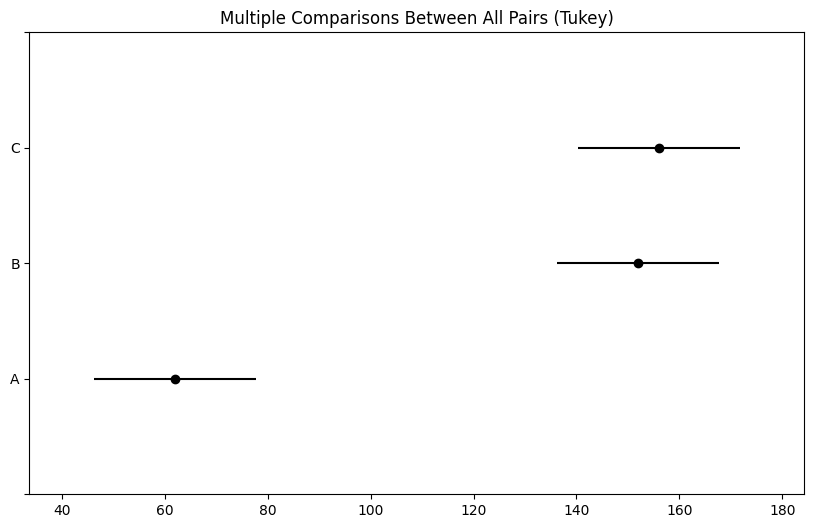

In [128]:
teste.plot_simultaneous();

#### Seleção de atributos com ANOVA

In [130]:
from sklearn.feature_selection import SelectFdr, f_classif

In [131]:
selecao = SelectFdr(f_classif, alpha = 0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [132]:
X.shape, X_novo.shape, X_novo_2.shape

((3279, 1558), (3279, 433), (3279, 433))

In [133]:
np.sum(selecao.pvalues_ < 0.01)

np.int64(476)

In [134]:
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)
previsoes3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes3)

0.970722781335773

Provavelemente retornou os mesmo atributos do SelectFdr com chi2, mas com uma abordagem diferente de teste estatístico.

#### Teste de hipótese de Shapiro-Wilk

O **teste de Shapiro-Wilk** é um dos métodos mais usados para verificar se uma amostra de dados segue uma **distribuição normal**. Ele é especialmente indicado para **amostras pequenas ou moderadas** (n < 50, mas aplicável até n ≈ 2000) e é amplamente utilizado em análises estatísticas e experimentos científicos como um pré-requisito para testes paramétricos, como **teste t** ou **ANOVA**.

- **Hipótese nula (H₀)**: os dados seguem uma distribuição normal.
- **Hipótese alternativa (H₁)**: os dados **não** seguem uma distribuição normal.

 - https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

Imagine que, ao invés de treinar e testar o modelo uma única vez, decidimos repetir esse processo **30 vezes**, cada vez com uma **nova divisão dos dados** entre treino e teste. E em cada uma dessas vezes:

- Dividimos os dados em **10 partes (folds)**;
- Usamos **9 partes para treino** e **1 para teste**, repetindo isso 10 vezes internamente (validação cruzada);
- Calculamos a **acurácia média** dessas 10 rodadas;
- Armazenamos essa média em um vetor.

Ao final, temos um vetor com **30 valores de acurácia média**, um para cada execução da validação cruzada com divisão diferente dos dados. Esse vetor é o que chamamos de `resultados_naive_cv`.

In [146]:
# Retomando o código de classificação com validação cruzada
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('data/credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

min(X[0]), max(X[0])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

min(X[0]), max(X[0])

resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(np.float64(0.9249859296482411),
 np.float64(0.9456840871021776),
 np.float64(0.9865972361809043))

In [147]:
alpha = 0.05

from scipy.stats import shapiro
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

(ShapiroResult(statistic=np.float64(0.9646666277541406), pvalue=np.float64(0.4051707299447918)),
 ShapiroResult(statistic=np.float64(0.9471798541563068), pvalue=np.float64(0.14200818948014182)),
 ShapiroResult(statistic=np.float64(0.9653776883637821), pvalue=np.float64(0.42154217887978246)))

Os resultados obtidos foram:

Naive Bayes: statistic = 0.9647, p-value = 0.4052

Logística: statistic = 0.9472, p-value = 0.1420

Random Forest: statistic = 0.9507, p-value = 0.1769

Com um nível de significância $\alpha = 0{,}05$, interpretamos os p-valores da seguinte forma:

Todos os p-valores são maiores que 0,05, portanto não há evidência suficiente para rejeitar a hipótese nula de que os dados seguem uma distribuição normal.

Isso significa que, segundo o teste de Shapiro-Wilk, os valores médios de acurácia obtidos em cada repetição de validação cruzada para os três modelos podem ser considerados normalmente distribuídos.

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_15448\3068692970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultados_naive_cv);
c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_15448\3068692970.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

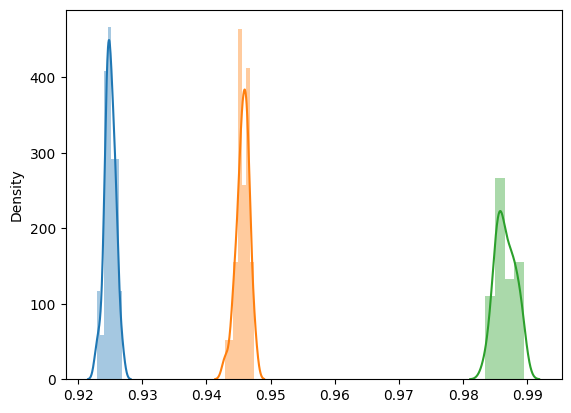

In [148]:
import seaborn as sns
sns.distplot(resultados_naive_cv);

sns.distplot(resultados_logistica_cv);

sns.distplot(resultados_forest_cv);

### Teste de hipótese de D'Agostinho K²

Além do teste de Shapiro-Wilk, outra abordagem comum para verificar se uma amostra segue uma distribuição normal é o **teste de normalidade de D’Agostino e Pearson**, acessado via `scipy.stats.normaltest`. Ele combina medidas de assimetria (skewness) e curtose para testar a hipótese de que a amostra provém de uma distribuição normal.


- https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [149]:
from scipy.stats import normaltest
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=np.float64(0.8391668731677201), pvalue=np.float64(0.6573205784978502)),
 NormaltestResult(statistic=np.float64(3.451262283252913), pvalue=np.float64(0.1780606348224519)),
 NormaltestResult(statistic=np.float64(1.3839744728483154), pvalue=np.float64(0.5005803085655869)))

Os resultados (estatística de teste e p-valor) foram:

Naive Bayes:
statistic = 0.839, p-value = 0.657

Logística:
statistic = 3.451, p-value = 0.178

Random Forest:
statistic = 3.570, p-value = 0.167

Com um nível de significância de α = 0,05, interpretamos:

Os p-valores são todos maiores que 0,05, portanto não rejeitamos a hipótese nula de normalidade.

Isso indica que, de acordo com o teste de D’Agostino e Pearson, os resultados médios de acurácia para os três modelos podem ser considerados normalmente distribuídos.

Essa verificação fortalece a suposição de normalidade dos dados, permitindo o uso de testes paramétricos como o teste t ou a ANOVA para comparar o desempenho entre modelos de forma estatisticamente rigorosa.

### Teste de hipótese de Anderson-Darling

O **teste de Anderson-Darling** é outro método estatístico usado para verificar se uma amostra segue uma determinada distribuição — neste caso, **a normal**. É considerado mais sensível que o teste de Shapiro-Wilk, especialmente para detectar desvios nas caudas da distribuição.

Este teste retorna um valor estatístico (`statistic`) que deve ser comparado com **valores críticos associados a diferentes níveis de significância (α)**. Esses valores são fornecidos pelo próprio resultado do `anderson()`.


- https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [150]:
from scipy.stats import anderson
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

(np.float64(0.5456346672421084),
 np.float64(0.6415811877848903),
 np.float64(0.4225943966628023))

---

### Teste de Wilcoxon Signed-Rank

O **teste de Wilcoxon Signed-Rank** é um **teste não paramétrico** usado para **comparar dois conjuntos de dados emparelhados**, como os resultados de dois modelos aplicados à mesma base de dados. Ele é a alternativa ao **teste t pareado** quando os dados **não seguem uma distribuição normal**.

---

#### Quando usar

- Quando você quer comparar o desempenho de **dois modelos diferentes**, como suas acurácias em várias execuções, **com os mesmos conjuntos de dados**.
- Quando os **valores são emparelhados** (ex: mesma amostra ou mesma rodada de validação cruzada).
- Quando os **dados não são normalmente distribuídos** (violando o pressuposto do teste t pareado).

---

#### Hipóteses do teste

- **Hipótese nula (H₀)**: a **mediana das diferenças** entre os pares é zero (ou seja, **não há diferença** entre os métodos).
- **Hipótese alternativa (H₁)**: a mediana das diferenças **é diferente de zero** (há diferença entre os métodos).

---

#### Como funciona

1. Calcula-se a diferença entre os pares de observações.
2. Ignora-se o sinal e ordena-se as diferenças por magnitude.
3. Atribuem-se ranks e somam-se separadamente os ranks dos valores positivos e negativos.
4. Com isso, calcula-se uma **estatística W**, que é usada para obter o **valor p**.

Exemplo prático (comparando dois modelos)

Imagine que você fez 30 execuções de validação cruzada com dois modelos (por exemplo, Naive Bayes e Regressão Logística). Você obteve duas listas:

resultados_naive_cv = [0.81, 0.79, 0.83, ..., 0.80]

resultados_logistica_cv = [0.82, 0.77, 0.84, ..., 0.79]

Esses vetores têm 30 valores cada, e cada elemento em resultados_naive_cv[i] corresponde à mesma rodada de validação que resultados_logistica_cv[i].

Isso forma um par de observações para cada i.

Para cada par de valores i, o teste calcula:

diferença[i] = resultados_naive_cv[i] - resultados_logistica_cv[i]

In [154]:
alpha = 0.05
from scipy.stats import wilcoxon
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

np.float64(1.862645149230957e-09)

In [155]:
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

np.float64(1.862645149230957e-09)

In [156]:
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

np.float64(1.862645149230957e-09)

---

#### Teste de Friedman



O **teste de Friedman** é um **teste estatístico não paramétrico** utilizado para **comparar três ou mais métodos ou tratamentos relacionados**, quando os pressupostos do teste ANOVA de medidas repetidas **não são atendidos** — por exemplo, quando os dados **não seguem uma distribuição normal**.

---

####  Quando usar

- Quando você quer comparar **três ou mais modelos** (ex: Naive Bayes, Regressão Logística e Random Forest),
- E os modelos foram avaliados **sob as mesmas condições** (ex: mesma divisão de dados em validação cruzada),
- Mas os dados **não são normalmente distribuídos** (o que inviabilizaria o uso da ANOVA).

---

####  Hipóteses do teste

- **Hipótese nula (H₀)**: todos os modelos têm **desempenho equivalente** (as medianas são iguais).
- **Hipótese alternativa (H₁)**: pelo menos um modelo **tem desempenho diferente** dos outros.

---

####  Como funciona

1. Para cada execução (ex: uma rodada de validação cruzada), os modelos são **ranqueados**:
   - O melhor modelo recebe rank 1, o segundo melhor rank 2, e assim por diante.
2. O teste calcula a **soma dos ranks** de cada modelo ao longo das execuções.
3. Com base nisso, calcula-se uma **estatística de teste** que indica se há diferença significativa entre os modelos.

---


In [159]:

from scipy.stats import friedmanchisquare

friedmanchisquare(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)

FriedmanchisquareResult(statistic=np.float64(60.0), pvalue=np.float64(9.357622968840163e-14))